In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd 
miasta = pd.read_excel('populacja_projekt_3.2.xls')
miasta.head()

,Miasto,Populacja,X,Y
0,Berlin,376949.5,13.4050,52.5200
1,Bialystok,29755.4,23.1667,53.1167
2,Bielskobiala,17066.3,19.0444,49.8225
3,Brno,38134.6,16.6068,49.1951
4,Brzesc,35061.6,23.7637,52.0997


In [2]:
projekt_2 = pd.read_excel('edges.xls')
projekt_2.head()
start_p2 = [x for x in list(projekt_2['stacja_start'])]
stop_p2 = [x for x in list(projekt_2['stacja_stop'])]
print(start_p2)

['Gdynia', 'Gdynia', 'Gdynia', 'Gdynia', 'Gdynia', 'Gdansk', 'Gdansk', 'Szczecin', 'Szczecin', 'Bydgoszcz', 'Bydgoszcz', 'Olsztyn', 'Grodno', 'Bialystok', 'Torun', 'Torun', 'Torun', 'Poznan', 'Poznan', 'Poznan', 'Warszawa', 'Warszawa', 'Warszawa', 'Warszawa', 'Warszawa', 'Warszawa', 'Warszawa', 'Warszawa', 'Lodz', 'Radom', 'Lublin', 'Wroclaw', 'Czestochowa', 'Bytom', 'Sosnowiec', 'Zabrze', 'Katowice', 'Krakow', 'Krakow', 'Krakow', 'Bielskobiala', 'Ostrawa', 'Lwow', 'Brno', 'Gdynia', 'Brzesc']


In [3]:
# utworzenie listy krawedzi na podstawie kolumn z df 'krawedzie' przed dodaniem szybkich polaczen - projekt 2
kraw_projekt_2 = nx.from_pandas_edgelist(projekt_2, source='stacja_start', target='stacja_stop', edge_attr=True)


(736, 746, 4)


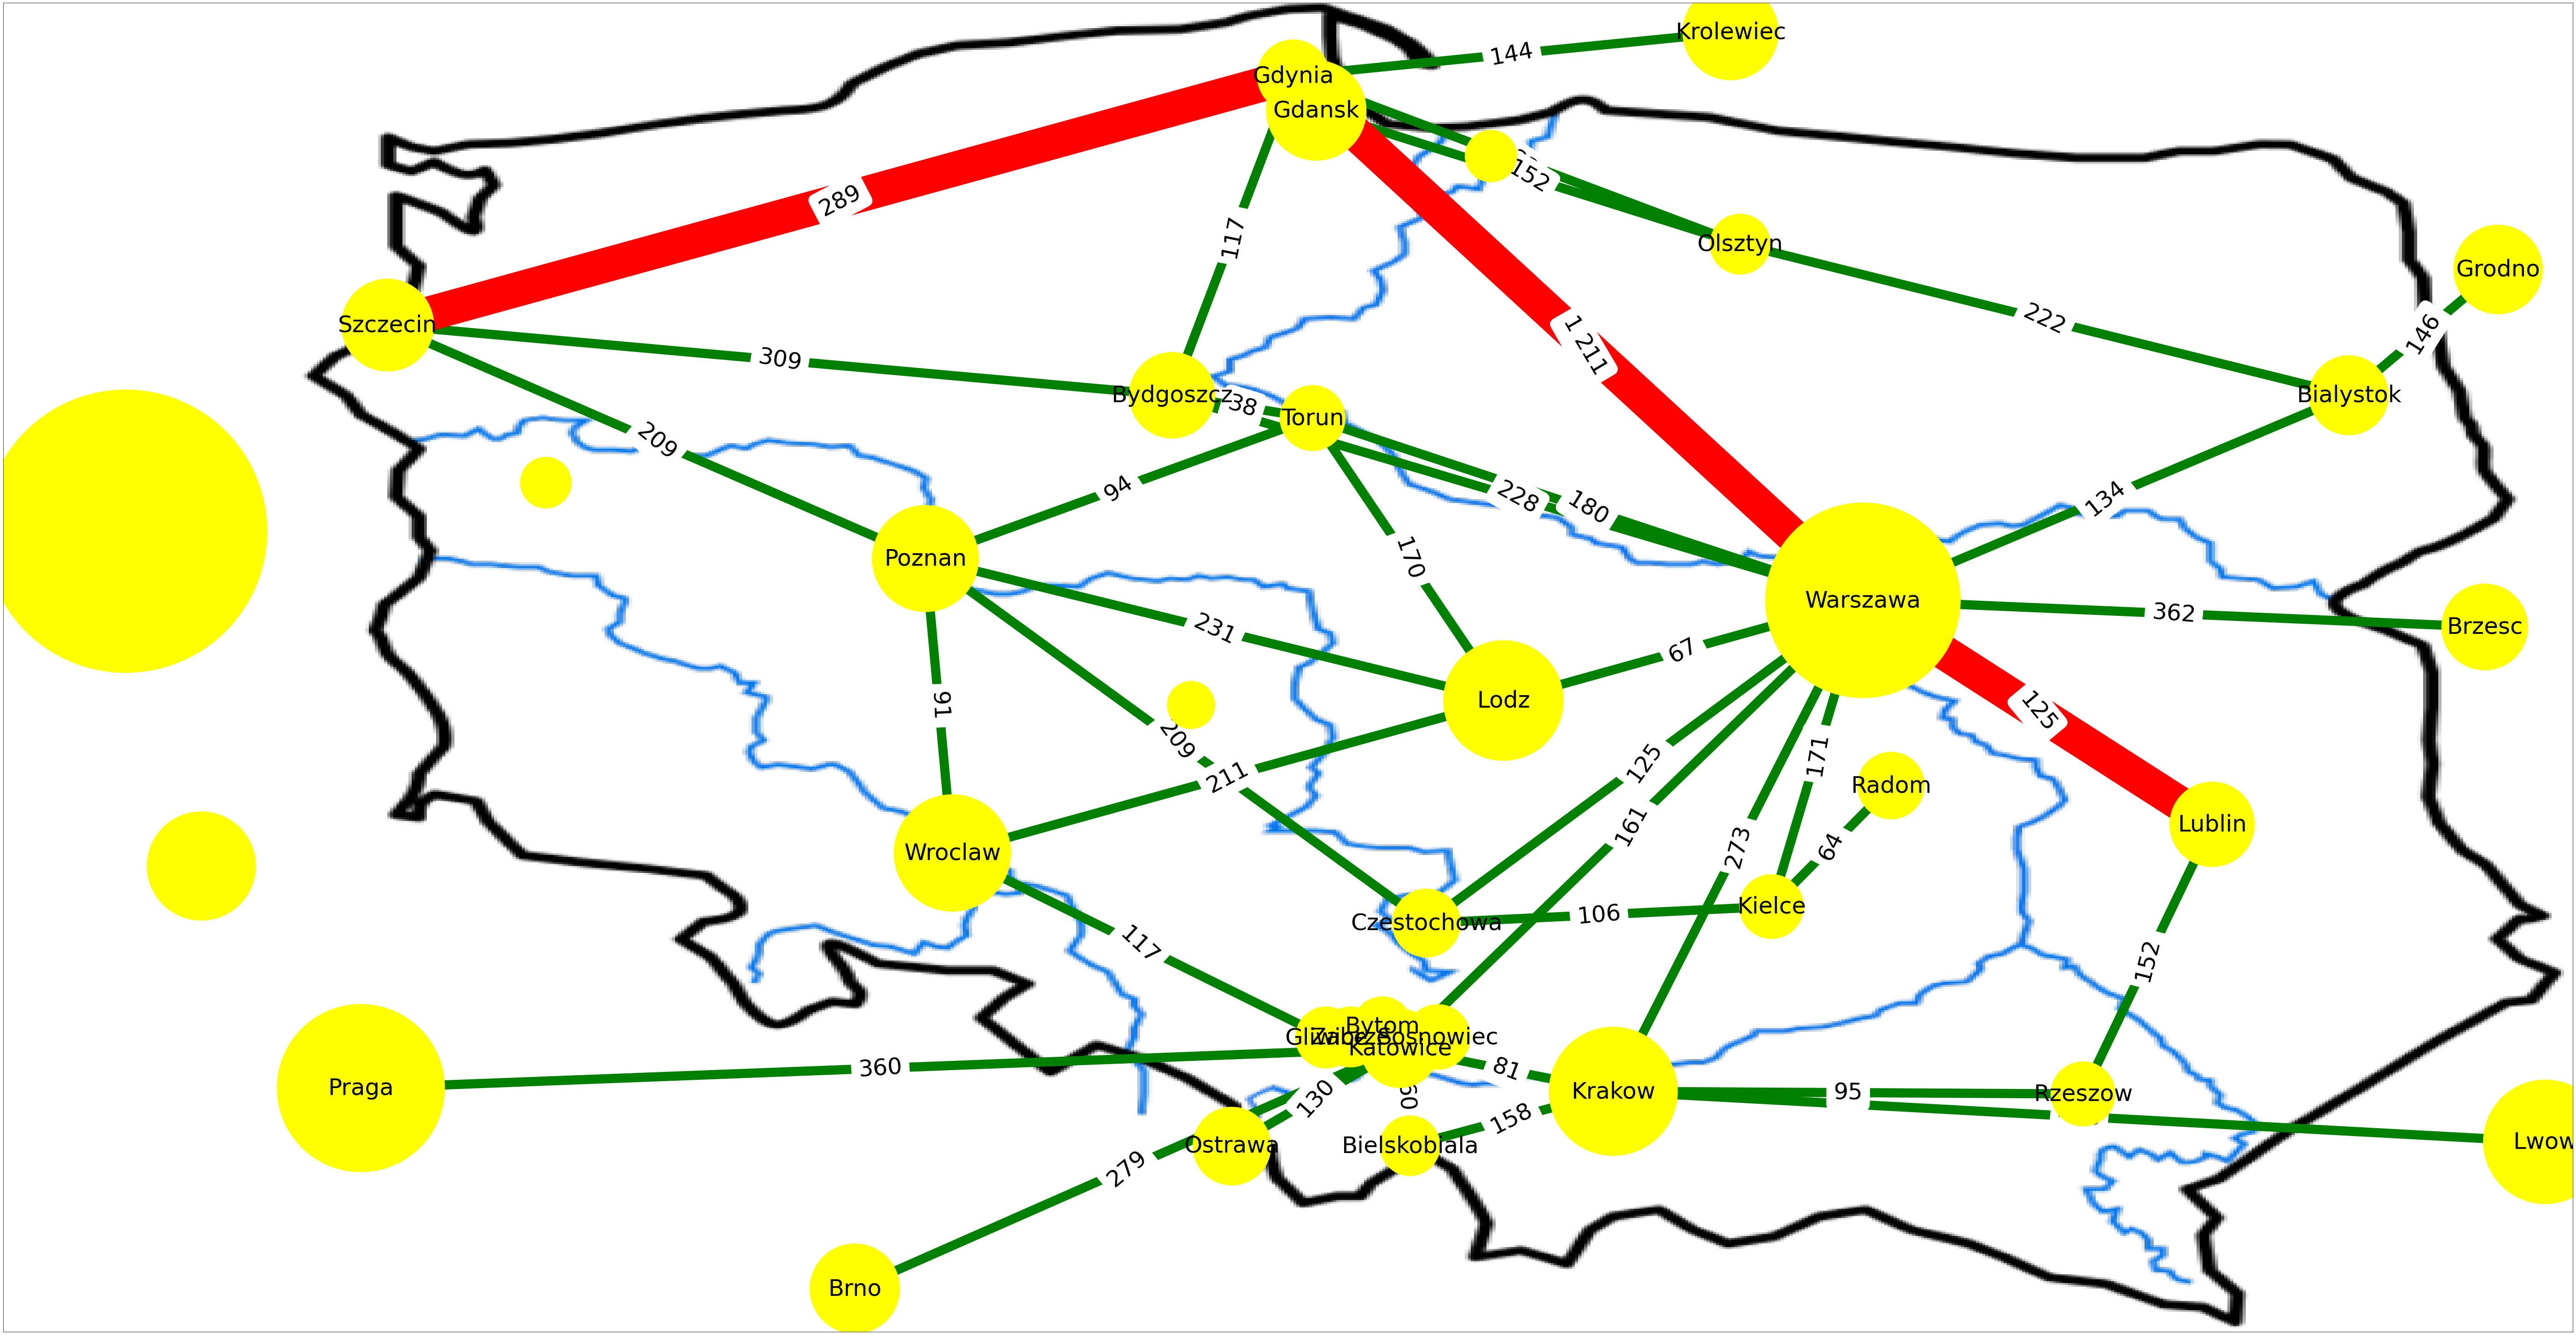

In [4]:
# wykorzystanie 2 metod zip() do polaczenia danych z kolumn df 'miasta' w slownik wyznaczajacy pozycje miast na grafie 
# key:value --> {'Miasto' : ('X', 'Y')}
pos = dict(zip(miasta['Miasto'], zip(miasta['X'], miasta['Y'])))
node = [x for x in miasta['Miasto']] # wykorzystanie 'list comperhension' do utworzenia listy z elementow kolumny 'Miasto'
pop = [x for x in miasta['Populacja']] # wykorzystanie 'list comperhension' do utworzenia listy z elementow kolumny 'Populacja'
# utworzenie tupli aby wykorzystac jako klucz w slowniku zwracajacym czas przejazdu (tupla bo klucz musi byc niemutowalny)
trasa_projekt_2 = tuple(zip(start_p2, stop_p2))
# metoda zip do utowrzenia slownika potrzebnego do nadania etykiet-wag na krawedziach grafu
edge_label_projekt_2 = dict(zip(trasa_projekt_2, projekt_2['czas_przejazdu']))
# pos - pozycje wezlow; nodelist - lista wezlow majacych znalezc sie na grafie; 
plt.figure(figsize=(100,100))
import matplotlib.image as mpimg
img = mpimg.imread('mapa.png')
print(img.shape)
# utworzenie zmiennych reprezetujacych szerokosc i wysokosc aby zeskalowac zdjecie 
hor_min = 14.123  # longitude top left
hor_max = 24.1507 # longitude top right
ver_min = 49.0064 # lattitude bottom left
ver_max = 54.8391 # lattitude bottom left
"""
http://berkeleyearth.lbl.gov/air-quality/maps/cities/Poland/Poland.inc

% Country: Poland
% Region: Poland
% Population: NaN
% Max Latitude: 54.8391
% Max Longitude: 24.1507
% Min Latitude: 49.0064
% Min Longitude: 14.123
"""
plt.imshow(img, extent=(hor_min, hor_max, ver_min, ver_max))
nx.draw_networkx(kraw_projekt_2, pos, nodelist=node, node_size=pop, edge_color='green', node_color="yellow", width=20, with_labels=True, font_size=50)

nx.draw_networkx_edge_labels(kraw_projekt_2, pos, font_size=50, edge_labels=edge_label_projekt_2)
# stworzenie listy krawedzi najszybszej trasy 
# w jedna komorka nizej wydrukowalem indeksy aby ulatwic tworzenie tej listy z metoda enumerate() - do usuniecia 
najszybsza_krawedzie = [trasa_projekt_2[21], trasa_projekt_2[3], trasa_projekt_2[2]]
nx.draw_networkx_edges(kraw_projekt_2, pos, edgelist=najszybsza_krawedzie, width=75, edge_color="red")

In [5]:
# to zrobione tylko po to aby znalezc indeksy tupli to wizualizacji trasy z alg dijkstry - do usuniecia 
for i, v in enumerate(trasa_projekt_2): print(i, v)

0 ('Gdynia', 'Gdansk')
1 ('Gdynia', 'Bydgoszcz')
2 ('Gdynia', 'Szczecin')
3 ('Gdynia', 'Warszawa')
4 ('Gdynia', 'Olsztyn')
5 ('Gdansk', 'Olsztyn')
6 ('Gdansk', 'Warszawa')
7 ('Szczecin', 'Poznan')
8 ('Szczecin', 'Bydgoszcz')
9 ('Bydgoszcz', 'Warszawa')
10 ('Bydgoszcz', 'Torun')
11 ('Olsztyn', 'Bialystok')
12 ('Grodno', 'Bialystok')
13 ('Bialystok', 'Warszawa')
14 ('Torun', 'Lodz')
15 ('Torun', 'Warszawa')
16 ('Torun', 'Poznan')
17 ('Poznan', 'Wroclaw')
18 ('Poznan', 'Czestochowa')
19 ('Poznan', 'Lodz')
20 ('Warszawa', 'Bialystok')
21 ('Warszawa', 'Lublin')
22 ('Warszawa', 'Krakow')
23 ('Warszawa', 'Czestochowa')
24 ('Warszawa', 'Katowice')
25 ('Warszawa', 'Lodz')
26 ('Warszawa', 'Kielce')
27 ('Warszawa', 'Katowice')
28 ('Lodz', 'Wroclaw')
29 ('Radom', 'Kielce')
30 ('Lublin', 'Rzeszow')
31 ('Wroclaw', 'Gliwice')
32 ('Czestochowa', 'Kielce')
33 ('Bytom', 'Gliwice')
34 ('Sosnowiec', 'Zabrze')
35 ('Zabrze', 'Gliwice')
36 ('Katowice', 'Praga')
37 ('Krakow', 'Rzeszow')
38 ('Krakow', 'Katowic

In [6]:
# wyznaczenie najszybszej drogi pomiedzy zadanymi punkami z wykorzystaniem algorytmu Dijkstry 
fast_p2 = nx.dijkstra_path(kraw_projekt_2, source='Lublin', target='Szczecin', weight='czas_przejazdu')

In [7]:
najszybsza_krawedzie = [trasa_projekt_2[21], trasa_projekt_2[3], trasa_projekt_2[2]]
czas_p2 = [edge_label_projekt_2[trasa_projekt_2[21]], 
           edge_label_projekt_2[trasa_projekt_2[3]],
           edge_label_projekt_2[trasa_projekt_2[2]]]

print("Najkrotszy przejazd: z {}.".format(" do ".join(fast_p2)))
print(f'Najszybsza trasa przejazdu z Lublina do Szczecina projekt_2 to: {fast_p2}')
print(f"Czas przejazdu z Lublina do Warszawy: {edge_label_projekt_2[trasa_projekt_2[21]]}")
print(f"Czas przejazdu z Warszawy do Gdyni: {edge_label_projekt_2[trasa_projekt_2[3]]}")
print(f"Czas przejazdu z Gdyni do Szczecina: {edge_label_projekt_2[trasa_projekt_2[2]]}")
print(f"Calkowity czas przejazdu: {sum(czas_p2)//60} godzin {sum(czas_p2)%60} minut")


Najkrotszy przejazd: z Lublin do Warszawa do Gdynia do Szczecin.
Najszybsza trasa przejazdu z Lublina do Szczecina projekt_2 to: ['Lublin', 'Warszawa', 'Gdynia', 'Szczecin']
Czas przejazdu z Lublina do Warszawy: 125
Czas przejazdu z Warszawy do Gdyni: 180
Czas przejazdu z Gdyni do Szczecina: 289
Calkowity czas przejazdu: 9 godzin 54 minut


In [8]:
krawedzie = pd.read_excel('edges_projekt_3.xls')
krawedzie.head()

,stacja_start,stacja_stop,czas_przejazdu
0,Gdynia,Gdansk,17
1,Gdynia,Bydgoszcz,117
2,Gdynia,Szczecin,289
3,Gdynia,Warszawa,180
4,Gdynia,Olsztyn,182


In [9]:
szybkie_koleje = pd.read_excel('szybkie_koleje.xls')
#utworzenie listy krawedzi do wyrysowania na grafie - to jest tylko na potrzebe wizualizacji szybkiej trasy
szybkie_krawedzie = list(zip(szybkie_koleje['stacja_start'], szybkie_koleje['stacja_stop']))
szybkie_koleje.head()

,stacja_start,stacja_stop,czas_przejazdu
0,Gdansk,Elblag,20
1,Elblag,Olsztyn,20
2,Olsztyn,Warszawa,45
3,Warszawa,Bialystok,45
4,Warszawa,Lodz,30


In [10]:
# polaczenie rekordow z dwoch arkuszy kalkulacyjnyc w jedna - data frame
krawedzie = krawedzie.append(szybkie_koleje)
# tu przerzucilem do list z bo mi nie zaciaglo z df. Na podstawie tych list dalej jest utworzona tupla trasa
start = [x for x in list(krawedzie['stacja_start'])]
stop = [x for x in list(krawedzie['stacja_stop'])]

In [11]:
# utworzenie listy krawedzi na podstawie kolumn z df 'krawedzie'
edge_pd = nx.from_pandas_edgelist(krawedzie, source='stacja_start', target='stacja_stop', edge_attr=True)

(736, 746, 4)
0 ('Gdansk', 'Elblag')
1 ('Elblag', 'Olsztyn')
2 ('Olsztyn', 'Warszawa')
3 ('Warszawa', 'Bialystok')
4 ('Warszawa', 'Lodz')
5 ('Lodz', 'Katowice')
6 ('Katowice', 'Krakow')
7 ('Lodz', 'Kalisz')
8 ('Kalisz', 'Wroclaw')
9 ('Kalisz', 'Poznan')
10 ('Poznan', 'Gorzow')
11 ('Gorzow', 'Szczecin')
12 ('Gorzow', 'Berlin')
13 ('Wroclaw', 'Praga')
14 ('Wroclaw', 'Drezno')


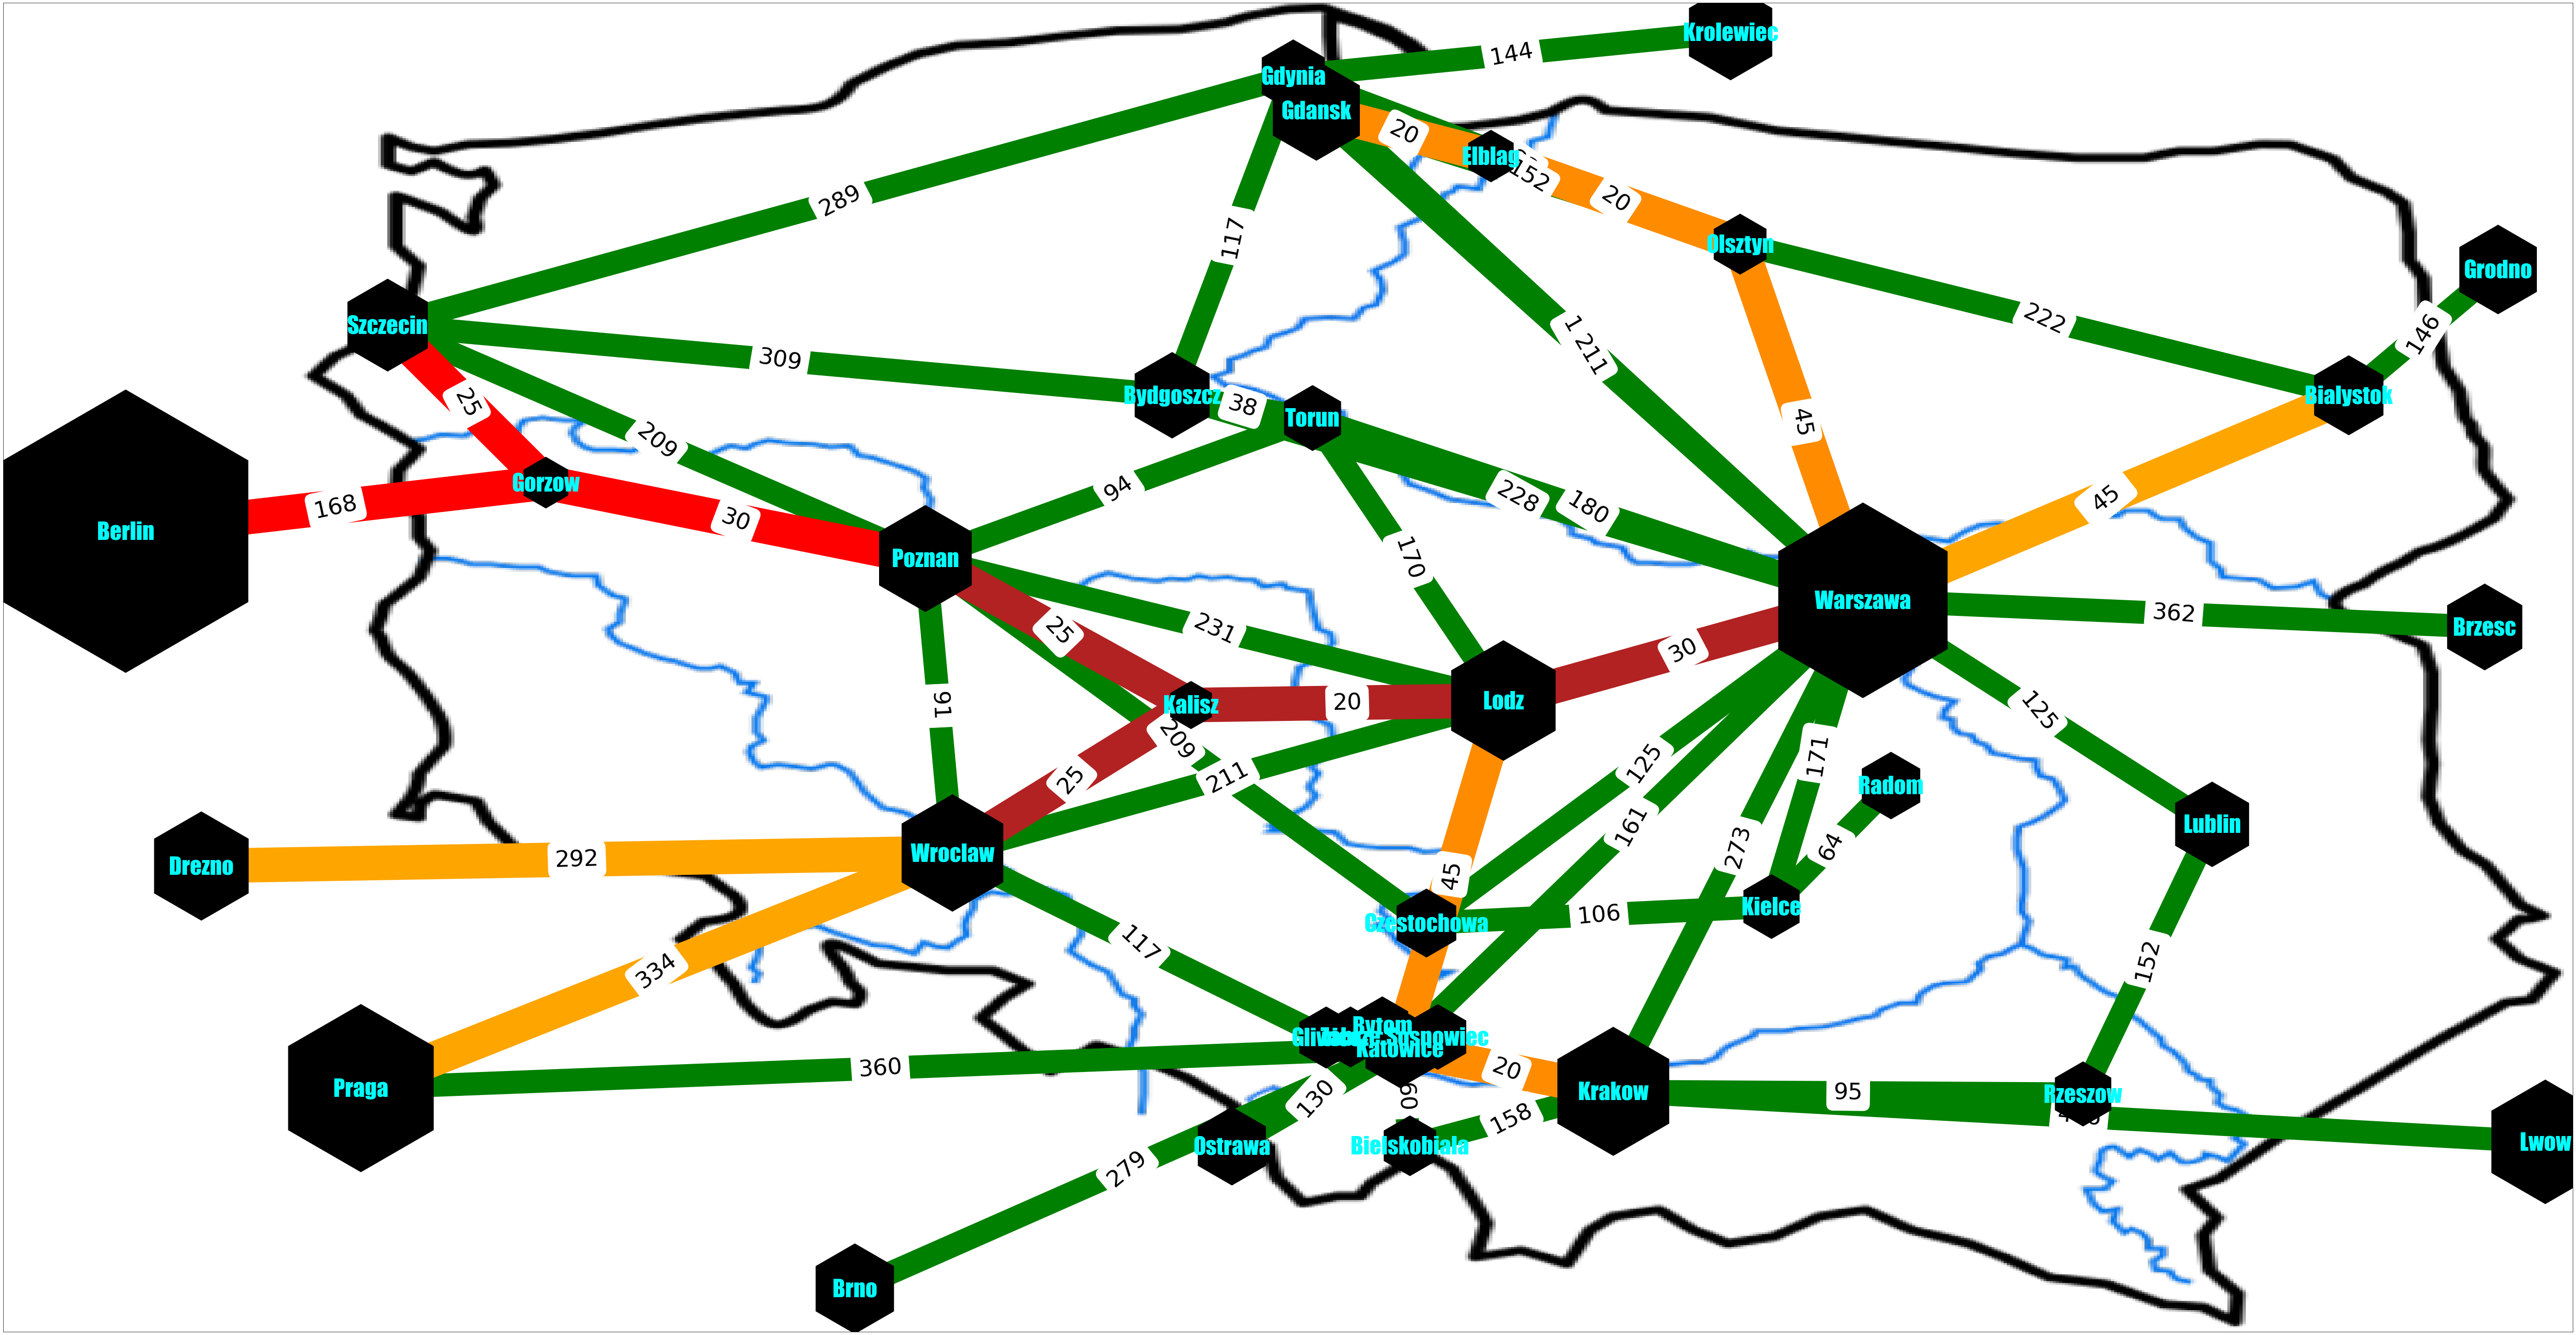

In [26]:
# https://networkx.org/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx
G = nx.Graph()
# wykorzystanie 2 metod zip() do polaczenia danych z kolumn df 'miasta' w slownik wyznaczajacy pozycje miast na grafie 
# key:value --> {'Miasto' : ('X', 'Y')}
pos = dict(zip(miasta['Miasto'], zip(miasta['X'], miasta['Y'])))
node = [x for x in miasta['Miasto']] # wykorzystanie 'list comperhension' do utworzenia listy z elementow kolumny 'Miasto'
pop = [x for x in miasta['Populacja']] # wykorzystanie 'list comperhension' do utworzenia listy z elementow kolumny 'Populacja'
# utworzenie tupli aby wykorzystac jako klucz w slowniku zwracajacym czas przejazdu (tupla bo klucz musi byc niemutowalny)
trasa = tuple(zip(start, stop))
# metoda zip do utowrzenia slownika potrzebnego do nadania etykiet-wag na krawedziach grafu
edge_label = dict(zip(trasa, krawedzie['czas_przejazdu']))
plt.figure(figsize=(100,100))
import matplotlib.image as mpimg
img = mpimg.imread('mapa.png')
print(img.shape)
hor_min = 14.123  # longitude top left
hor_max = 24.1507 # longitude top right
ver_min = 49.0064 # lattitude bottom left
ver_max = 54.8391 # lattitude bottom left
"""% Country: Poland
% Region: Poland
% Population: NaN
% Max Latitude: 54.8391
% Max Longitude: 24.1507
% Min Latitude: 49.0064
% Min Longitude: 14.123
"""
plt.imshow(img, extent=(hor_min, hor_max, ver_min, ver_max))

# pos - pozycje wezlow; nodelist - lista wezlow majacych znalezc sie na grafie; 
nx.draw_networkx(edge_pd, pos, nodelist=node, node_size=pop,node_shape='h', edge_color='green', node_color="black", width=50, with_labels=True, font_size=50,font_family='fantasy', font_color="cyan")
nx.draw_networkx_edge_labels(edge_pd, pos, font_size=50, edge_labels=edge_label)
# wyrysowanie trasy szybkich kolei innym kolorem
nx.draw_networkx_edges(edge_pd, pos, edgelist=szybkie_krawedzie, width=50, edge_color="pink")
# wyrysowanie roznych etapow jak w zadaniu: 
#Etap 1 - Warszawa - Lodz, Lodz - Kalisz, Kalisz - Wroclaw, Kalisz - Poznan
for i,v in enumerate(szybkie_krawedzie): print(i,v) # znalezienie indeksow do latwiejszego zmapowania
etap_1 = [szybkie_krawedzie[4], szybkie_krawedzie[7], szybkie_krawedzie[8], szybkie_krawedzie[9]]
nx.draw_networkx_edges(edge_pd, pos, edgelist=etap_1, width=75, edge_color="firebrick")
#Etap 2, 
etap_2 = [szybkie_krawedzie[10], szybkie_krawedzie[11], szybkie_krawedzie[12]]
nx.draw_networkx_edges(edge_pd, pos, edgelist=etap_2, width=75, edge_color="red")
#Etap 3, 
etap_3 = [szybkie_krawedzie[13], szybkie_krawedzie[14], szybkie_krawedzie[3]]
nx.draw_networkx_edges(edge_pd, pos, edgelist=etap_3, width=75, edge_color="orange")
#Etap 4 
etap_4 = [szybkie_krawedzie[0], szybkie_krawedzie[1], szybkie_krawedzie[2], szybkie_krawedzie[5], szybkie_krawedzie[6]]
nx.draw_networkx_edges(edge_pd, pos, edgelist=etap_4, width=75, edge_color="darkorange")
# kolory https://matplotlib.org/2.0.2/examples/color/named_colors.html

In [13]:
fast_p3 = nx.dijkstra_path(edge_pd, source='Lublin', target='Szczecin', weight='czas_przejazdu')
czas_p3 = [edge_label[('Warszawa','Lublin')], 
        edge_label[('Warszawa','Lodz')],
        edge_label[('Lodz','Kalisz')], 
        edge_label[('Kalisz','Poznan')], 
        edge_label[('Poznan','Gorzow')], 
        edge_label[('Gorzow','Szczecin')]]

print("Najkrotszy przejazd: z {}.".format(" do ".join(fast_p3)))
print(f"Czas przejazdu z Lublina do Warszawy: {edge_label[('Warszawa','Lublin')]}")
print(f"Czas przejazdu z Warszawy do Lodzi: {edge_label[('Warszawa','Lodz')]}")
print(f"Czas przejazdu z Lodzi do Kalisza: {edge_label[('Lodz','Kalisz')]}")
print(f"Czas przejazdu z Kalisza do Poznania: {edge_label[('Kalisz','Poznan')]}")
print(f"Czas przejazdu z Poznania do Gorzowa Wielkopolskiego: {edge_label[('Poznan','Gorzow')]}")
print(f"Czas przejazdu z Gorzowa Wielkopolskiego do Szczecina {edge_label[('Gorzow','Szczecin')]}")
print(f"Calkowity czas przejazdu: {sum(czas_p3)//60} godzin {sum(czas_p3)%60} minut")


Najkrotszy przejazd: z Lublin do Warszawa do Lodz do Kalisz do Poznan do Gorzow do Szczecin.
Czas przejazdu z Lublina do Warszawy: 125
Czas przejazdu z Warszawy do Lodzi: 30
Czas przejazdu z Lodzi do Kalisza: 20
Czas przejazdu z Kalisza do Poznania: 25
Czas przejazdu z Poznania do Gorzowa Wielkopolskiego: 30
Czas przejazdu z Gorzowa Wielkopolskiego do Szczecina 25
Calkowity czas przejazdu: 4 godzin 15 minut


In [14]:
"""Returns:	
path_generator – A generator that produces lists of simple paths, in order from shortest to longest."""
ilosc_tras = []
simple_paths = nx.shortest_simple_paths(edge_pd, source='Lublin', target='Szczecin', weight='czas_przejazdu')
for i,v in enumerate(simple_paths): 
    print(i,v)
    ilosc_tras.append(v)



0 ['Lublin', 'Warszawa', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1 ['Lublin', 'Warszawa', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
2 ['Lublin', 'Warszawa', 'Lodz', 'Kalisz', 'Poznan', 'Szczecin']
3 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
4 ['Lublin', 'Warszawa', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
5 ['Lublin', 'Warszawa', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
6 ['Lublin', 'Warszawa', 'Torun', 'Poznan', 'Gorzow', 'Szczecin']
7 ['Lublin', 'Warszawa', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
8 ['Lublin', 'Warszawa', 'Lodz', 'Torun', 'Poznan', 'Gorzow', 'Szczecin']
9 ['Lublin', 'Warszawa', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
10 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
11 ['Lublin', 'Warszawa', 'Lodz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
12 ['Lublin', 'Warszawa', 'Czestochowa'

103 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Szczecin']
104 ['Lublin', 'Warszawa', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
105 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
106 ['Lublin', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
107 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
108 ['Lublin', 'Warszawa', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
109 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
110 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Lodz', 'Kalisz', 'Poznan', 'Szczecin']
111 ['Lublin', 'Warszawa', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Szczecin']
112 ['Lublin', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Poznan', 'Szczecin']
113

218 ['Lublin', 'Warszawa', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Szczecin']
219 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
220 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
221 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
222 ['Lublin', 'Warszawa', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
223 ['Lublin', 'Warszawa', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
224 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
225 ['Lublin', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
226 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Gorzow', 'Szczecin']
227 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobi

295 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
296 ['Lublin', 'Warszawa', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
297 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Torun', 'Poznan', 'Szczecin']
298 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Gorzow', 'Szczecin']
299 ['Lublin', 'Warszawa', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
300 ['Lublin', 'Warszawa', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
301 ['Lublin', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
302 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Warszawa', 'Gdynia', 'Szczecin']
303 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Katowice', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
304 ['Lublin', '

376 ['Lublin', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Szczecin']
377 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
378 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Torun', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
379 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
380 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
381 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Warszawa', 'Torun', 'Bydgoszcz', 'Szczecin']
382 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Lodz', 'Torun', 'Bydgoszcz', 'Szczecin']
383 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
384 ['Lublin', 'Rzeszow', 'Krakow', 'Katowic

515 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
516 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
517 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
518 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
519 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdynia', 'Szczecin']
520 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
521 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bydgoszcz', 'Szczecin']
522 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wa

597 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
598 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Warszawa', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
599 ['Lublin', 'Warszawa', 'Czestochowa', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Szczecin']
600 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
601 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
602 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
603 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
604 ['Lublin', 'Warszawa', 'Czestochowa', 'Poznan', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 

665 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
666 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
667 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Szczecin']
668 ['Lublin', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
669 ['Lublin', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
670 ['Lublin', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
671 ['Lublin', 'Warszawa', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
672 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', '

725 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
726 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
727 ['Lublin', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
728 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
729 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
730 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
731 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Gorzow', 'Szczecin']
732 ['Lublin', 'Warszawa', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', '

806 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Torun', 'Lodz', 'Poznan', 'Szczecin']
807 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
808 ['Lublin', 'Warszawa', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
809 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
810 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
811 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
812 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
813 ['Lublin', 'Warsza

883 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
884 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
885 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
886 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
887 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
888 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdynia', 'Szczecin']
889 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Gdynia', 'Szcze

949 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Poznan', 'Szczecin']
950 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
951 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Szczecin']
952 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
953 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
954 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
955 ['Lublin', 'Warszawa', 'Czestochowa', 'Poznan', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdyn

1034 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
1035 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1036 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Gdansk', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
1037 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
1038 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
1039 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
1040 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Olszt

1093 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
1094 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Bydgoszcz', 'Szczecin']
1095 ['Lublin', 'Warszawa', 'Lodz', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
1096 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Szczecin']
1097 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
1098 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
1099 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bydgoszcz', 'Szczecin']
1100 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', '

1161 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdynia', 'Szczecin']
1162 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
1163 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
1164 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1165 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
1166 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
1167 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobi

1217 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1218 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
1219 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
1220 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1221 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1222 ['Lublin', 'Warszawa', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
1223 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin

1274 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
1275 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
1276 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1277 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1278 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1279 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
1280 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Olsztyn

1328 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Czestochowa', 'Poznan', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Szczecin']
1329 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Szczecin']
1330 ['Lublin', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1331 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1332 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
1333 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Wroclaw'

1408 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
1409 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1410 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
1411 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
1412 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
1413 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
1414 ['Lublin', 'Rzeszow', 'Krakow', 'Bi

1475 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
1476 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
1477 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
1478 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Torun', 'Bydgoszcz', 'Szczecin']
1479 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1480 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
1481 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lod

1529 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdynia', 'Szczecin']
1530 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Poznan', 'Szczecin']
1531 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Olsztyn', 'Gdansk', 'Warszawa', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
1532 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
1533 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
1534 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Szczecin']
1535 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Pozn

1591 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1592 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1593 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1594 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
1595 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1596 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Warszawa', 'Gdynia', 'Szcz

1661 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
1662 ['Lublin', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1663 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Poznan', 'Szczecin']
1664 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1665 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
1666 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Poznan', 'Szczecin']
1667 ['Lublin', 'Rzeszow', 'Krakow', 'Biels

1726 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
1727 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Szczecin']
1728 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
1729 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1730 ['Lublin', 'Warszawa', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
1731 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin'

1795 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1796 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
1797 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
1798 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
1799 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Szczecin']
1800 ['Lublin', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Katowice', 'Praga',

1849 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Szczecin']
1850 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
1851 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
1852 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1853 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1854 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Poznan', 'Gorzow', 'Szczecin']
1855 ['Lublin', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz',

1917 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1918 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Szczecin']
1919 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Gdansk', 'Elblag', 'Olsztyn', 'Bialystok', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
1920 ['Lublin', 'Warszawa', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
1921 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
1922 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poz

1978 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
1979 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
1980 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
1981 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1982 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
1983 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
1984 ['Lublin',

2056 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Gorzow', 'Szczecin']
2057 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
2058 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
2059 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2060 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2061 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szc

2120 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2121 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Gorzow', 'Szczecin']
2122 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
2123 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2124 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
2125 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszaw

2186 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
2187 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Szczecin']
2188 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2189 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2190 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2191 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'L

2251 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2252 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Warszawa', 'Bydgoszcz', 'Szczecin']
2253 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Szczecin']
2254 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2255 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Czestochowa', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
2256 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Olsztyn', 'Elblag', 'Gdansk', 'Warszawa', 'Czestochowa', 'Poznan', 'Szczecin']
2257 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala

2318 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
2319 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Czestochowa', 'Poznan', 'Kalisz', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2320 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bydgoszcz', 'Szczecin']
2321 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2322 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2323 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
2324 [

2377 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2378 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
2379 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2380 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
2381 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
2382 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn

2431 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Lodz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2432 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2433 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
2434 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
2435 ['Lublin', 'Warszawa', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2436 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Szczecin']
2437 ['Lublin', 'Rzeszow', 'Krakow', 

2483 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Bydgoszcz', 'Szczecin']
2484 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
2485 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2486 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Lodz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
2487 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Wroclaw', 'Poznan', 'Szczecin']
2488 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', '

2560 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
2561 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2562 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2563 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2564 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
2565 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2566 ['Lublin', '

2643 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Gdansk', 'Warszawa', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
2644 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
2645 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2646 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2647 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
2648 ['Lublin', 'Warszawa', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Szczecin']
2649 ['Lublin', 'R

2702 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdynia', 'Szczecin']
2703 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2704 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2705 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2706 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
2707 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Bydgoszcz', 'Torun', 'Poznan', 'S

2751 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2752 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2753 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2754 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
2755 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
2756 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Kalisz', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', '

2816 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2817 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2818 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
2819 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
2820 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
2821 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', '

2892 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2893 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2894 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
2895 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2896 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
2897 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdynia', 'Szczecin']
2898 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroc

2998 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Szczecin']
2999 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3000 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3001 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdynia', 'Szczecin']
3002 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3003 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn

3056 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3057 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Warszawa', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
3058 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Szczecin']
3059 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Olsztyn', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
3060 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3061 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz',

3121 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
3122 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
3123 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
3124 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Bydgoszcz', 'Szczecin']
3125 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
3126 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 

3171 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3172 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3173 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
3174 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Lodz', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
3175 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3176 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'O

3224 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3225 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
3226 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3227 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
3228 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Lodz', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3229 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa'

3281 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3282 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3283 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
3284 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3285 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3286 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3287 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Ka

3343 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3344 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3345 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3346 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Lodz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3347 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3348 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz

3391 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
3392 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
3393 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Szczecin']
3394 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Bydgoszcz', 'Szczecin']
3395 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3396 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
3397 ['Lublin', 'Rzeszow', 'Krakow', 'Kat

3445 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3446 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Gorzow', 'Szczecin']
3447 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
3448 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
3449 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
3450 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Wars

3494 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Gorzow', 'Szczecin']
3495 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
3496 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
3497 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
3498 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Torun', 'Bydgoszcz', 'Szczecin']
3499 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', '

3547 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3548 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Torun', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
3549 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Gdansk', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
3550 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
3551 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
3552 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 

3612 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
3613 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Poznan', 'Szczecin']
3614 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3615 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
3616 ['Lublin', 'Rzeszow', 'Krakow', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Torun', 'Lodz', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Szczecin']
3617 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice',

3663 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
3664 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3665 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Gdansk', 'Olsztyn', 'Bialystok', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
3666 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
3667 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3668 ['L

3717 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
3718 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Warszawa', 'Bydgoszcz', 'Szczecin']
3719 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3720 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3721 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3722 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Poznan', 'Czesto

3763 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3764 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
3765 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
3766 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdynia', 'Szczecin']
3767 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
3768 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szcz

3824 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3825 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3826 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
3827 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
3828 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdynia', 'Szczecin']
3829 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Warszawa', '

3881 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Olsztyn', 'Gdynia', 'Szczecin']
3882 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
3883 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
3884 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Gdansk', 'Elblag', 'Olsztyn', 'Bialystok', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Gorzow', 'Szczecin']
3885 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczeci

3928 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3929 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3930 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3931 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
3932 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Szczecin']
3933 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalis

3996 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
3997 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Gdynia', 'Szczecin']
3998 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
3999 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4000 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
4001 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'L

4045 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
4046 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
4047 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Gdansk', 'Olsztyn', 'Bialystok', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Szczecin']
4048 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4049 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
4050 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'W

4105 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Olsztyn', 'Bialystok', 'Warszawa', 'Czestochowa', 'Poznan', 'Szczecin']
4106 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
4107 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
4108 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bydgoszcz', 'Szczecin']
4109 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
4110 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala',

4163 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bydgoszcz', 'Gdynia', 'Szczecin']
4164 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
4165 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4166 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Torun', 'Bydgoszcz', 'Gdynia', 'Szczecin']
4167 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4168 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wrocl

4221 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4222 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4223 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Torun', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4224 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4225 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Kalisz', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
4226 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala'

4265 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Torun', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
4266 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
4267 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
4268 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4269 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4270 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wrocla

4326 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Szczecin']
4327 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Olsztyn', 'Bialystok', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Szczecin']
4328 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Poznan', 'Lodz', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
4329 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
4330 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Szczecin']
4331 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Ka

4377 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4378 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdynia', 'Szczecin']
4379 ['Lublin', 'Rzeszow', 'Krakow', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4380 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Torun', 'Bydgoszcz', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Szczecin']
4381 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Elblag', 'Gdansk', 'Gdynia', 'Szczecin']
4382 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala'

4421 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4422 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4423 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4424 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Kalisz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4425 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgo

4464 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Kalisz', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4465 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Bydgoszcz', 'Gdynia', 'Olsztyn', 'Gdansk', 'Warszawa', 'Kielce', 'Czestochowa', 'Poznan', 'Szczecin']
4466 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4467 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Elblag', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']
4468 ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Bialystok', 'Olsztyn', 'Gdansk', 'Gdyn

In [24]:
print(f'Ilosc wszstkich tras pomiedzy Lublin a Szczecin\nWygenerowanych przez metode shortest_simple_paths : {len(ilosc_tras)}')

Ilosc wszstkich tras pomiedzy Lublin a Szczecin
Wygenerowanych przez metode shortest_simple_paths : 4476


In [19]:
print(f'Najdluzsza trasa: {ilosc_tras[-1]}')

Najdluzsza trasa: ['Lublin', 'Rzeszow', 'Krakow', 'Bielskobiala', 'Katowice', 'Praga', 'Wroclaw', 'Lodz', 'Torun', 'Poznan', 'Czestochowa', 'Kielce', 'Warszawa', 'Gdansk', 'Olsztyn', 'Gdynia', 'Bydgoszcz', 'Szczecin']


In [22]:
print("Najdluzszy przejazd z Lublin do Szczecin to:\n z {}.".format(" do ".join(ilosc_tras[-1])))

Najdluzszy przejazd z Lublin do Szczecin to:
 z Lublin do Rzeszow do Krakow do Bielskobiala do Katowice do Praga do Wroclaw do Lodz do Torun do Poznan do Czestochowa do Kielce do Warszawa do Gdansk do Olsztyn do Gdynia do Bydgoszcz do Szczecin.
